In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.DataFrame (np.random.randint(0,100, size = (1000,12)), columns = list('ABCDEFGHIJKL')) 
print (df)

      A   B   C   D   E   F   G   H   I   J   K   L
0    58  35  26  36  44  21  76  15  84  69  40  29
1    39  84  38  90  23  35  38  15   8  45  53  13
2    14  35  74  89  88  90  72  52  58  51  68   3
3    69  81  23  21   2  91  67  60  62  65  14  37
4    46  31   1  75  62   4  78  52  70   9   7  64
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
995  82  64  31  60  67  68  58  31  82  13  99  17
996  92   4  56  45  27  55  98  13  73  32  62  45
997  45  75  66  44  89  41  61  61  28  86  33  43
998  66  86  91  69  57  95  97  75  62   5  20  26
999  67  39  97  89   0  19  42  44  57  50  37  37

[1000 rows x 12 columns]


In [7]:
df = pd.read_csv('data/ffpub21.csv')
print(df.head)

<bound method NDFrame.head of        FPOVCUT  FPERSONS  FHEADIDX  FSPOUIDX  FOWNU6  FRELU6  FKIND  FKINDEX  \
0        20244         3         1         2       0       0      1        1   
1        20244         3         1         2       0       0      1        1   
2        12413         1         1         0       0       0      2        3   
3        17839         2         1         0       0       0      2        3   
4        13465         1         3         0       0       0      3        4   
...        ...       ...       ...       ...     ...     ...    ...      ...   
73146    37174         3         4         5       1       1      1        1   
73147    13465         1         1         0       0       0      2        3   
73148    12413         1         1         0       0       0      2        3   
73149    15644         2         1         2       0       0      1        1   
73150    17331         2         1         2       0       0      1        2   

       FT

In [8]:
#list columns in data frame
print(list(df))

['FPOVCUT', 'FPERSONS', 'FHEADIDX', 'FSPOUIDX', 'FOWNU6', 'FRELU6', 'FKIND', 'FKINDEX', 'FTYPE', 'FRELU18', 'FOWNU18', 'FLASTIDX', 'FMLASIDX', 'FH_SEQ', 'FAMLIS', 'FANNVAL', 'FCSPVAL', 'FDISVAL', 'FDIVVAL', 'FDSTVAL', 'FEARNVAL', 'FEDVAL', 'FFINVAL', 'FFPOS', 'FFRVAL', 'FHIP_VAL', 'FHIP_VAL2', 'FINC_ANN', 'FINC_CSP', 'FINC_DIS', 'FINC_DIV', 'FINC_DST', 'FINC_ED', 'FINC_FIN', 'FINC_FR', 'FINC_INT', 'FINC_OI', 'FINC_PAW', 'FINC_PEN', 'FINC_RNT', 'FINC_SE', 'FINC_SS', 'FINC_SSI', 'FINC_SUR', 'FINC_UC', 'FINC_VET', 'FINC_WC', 'FINC_WS', 'FINTVAL', 'FMED_VAL', 'FMOOP', 'FMOOP2', 'FOIVAL', 'FOTC_VAL', 'FOTHVAL', 'FPAWVAL', 'FPCTCUT', 'FPENVAL', 'FRECORD', 'FRNTVAL', 'FRSPOV', 'FRSPPCT', 'FSEVAL', 'FSPANISH', 'FSSIVAL', 'FSSVAL', 'FSUP_WGT', 'FSURVAL', 'FTOTVAL', 'FTOT_R', 'FUCVAL', 'FVETVAL', 'FWCVAL', 'FWSVAL', 'F_MV_FS', 'F_MV_SL', 'I_FHIPVAL', 'I_FHIPVAL2', 'I_FMEDVAL', 'I_FMOOP', 'I_FMOOP2', 'I_FOTCVAL', 'POVLL', 'FILEDATE', 'YYYYMM']


In [9]:
col = 'FKINDEX' #<-edit this value! column name as it appears in dataframe
col_name = '(Types of Married Familes)' #<-edit this value! descriptive name for column
freq = df[col].value_counts().rename_axis(col_name).reset_index(name='freq')
freq = freq.sort_values(by = col_name)
print(freq)

   (Types of Married Familes)   freq
0                           1  31976
3                           2    330
2                           3  17439
1                           4  23406


In [17]:
codebook = [['0', 'Types of Married Families'], #<- if appropriate, replace these values based on codebook or data dictionary for your dataset
            ['1', 'Opposite-sex married couple family'], 
            ['2', 'Same-sex married couple family'], 
            ['3', 'Male reference person '], 
            ['4', 'Female reference person']]
for lbl in codebook:
    freq[col_name] = freq[col_name].replace(int(lbl[0]), lbl[1])

print(freq)

           (Types of Married Familes)   freq
0  Opposite-sex married couple family  31976
3      Same-sex married couple family    330
2              Male reference person   17439
1             Female reference person  23406


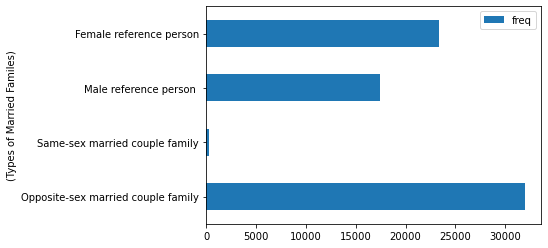

In [18]:
ax = freq.plot.barh(x=col_name, y='freq', rot=0)